# UCDSML Lecture 12 Part 5

## Neural Networks (MLP)

## Prof. James Sharpnack

In [41]:
# This was modified from Tensorflow tutorial: https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough
# All appropriate copywrites are retained, use of this material is guided by fair use for teaching
# Some modifications made for course STA 208 by James Sharpnack jsharpna@gmail.com

#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

### Importing and installing tensorflow

- install tensorflow 2.0 with conda (you do not need to install tensorflow-gpu for the course)
- tensorflow, build and execute computational graphs
- tensorflow 1.0 and 2.0 differ mainly by making eager execution default, removing sessions

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.1.0
Eager execution: True


In [2]:
tf.keras.backend.set_floatx('float64')

### Loading data

- tensorflow has many built in utilities for getting data
- you could just as easily use requests/pandas

In [3]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: C:\SPB_Data\.keras\datasets\iris_training.csv


In [4]:
train_df = pd.read_csv(train_dataset_fp)
train_dataset = tf.data.Dataset.from_tensor_slices((train_df.values[:,:-1],train_df.values[:,-1]))

### Tensorflow datasets API

- Datasets API loads and readies data for use in stochastic gradient descent type iteration
- the batch size tells it how many samples for the mini-batch
- Dataset has methods to shuffle the data and apply transformations 

In [5]:
batch_size = 32

train_dataset = train_dataset.shuffle(1000)
train_dataset = train_dataset.batch(batch_size)
## sets batchsize and shuffles

In [6]:
X,y = next(iter(train_dataset))
X

<tf.Tensor: shape=(32, 4), dtype=float64, numpy=
array([[5. , 3. , 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 2.9, 4.2, 1.3],
       [6.2, 3.4, 5.4, 2.3],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [7.2, 3.2, 6. , 1.8],
       [4.6, 3.6, 1. , 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 3.3, 6. , 2.5],
       [6.1, 3. , 4.9, 1.8],
       [7.2, 3. , 5.8, 1.6],
       [4.6, 3.2, 1.4, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [7.7, 3. , 6.1, 2.3],
       [6.1, 2.9, 4.7, 1.4],
       [4.4, 2.9, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [6. , 2.2, 5. , 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [7.9, 3.8, 6.4, 2. ],
       [4.8, 3. , 1.4, 0.3],
       [6.2, 2.2, 4.5, 1.5],
       [4.8, 3.4, 1.6, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [5. , 3.5, 1.3, 0.3],
       [4.8, 3. , 1.4, 0.1],
       [4.5, 2.3, 1.3, 0.3]])>

### Adding Layers to Keras Model

- keras model can include more layers
- simplest way is with tf.keras.Sequential
- can make custom layers (beyond scope of class)

In [7]:
train_dataset.element_spec
# the input dimenstion is 4  (m x 4 tensors)

(TensorSpec(shape=(None, 4), dtype=tf.float64, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

In [8]:
lin_layers = tf.keras.layers.Dense(3)
lin_layers(X)
## Builds and calls the layer
# these are the logits for the logistical model (later we take the cross entropy which is the softmax function)

<tf.Tensor: shape=(32, 3), dtype=float64, numpy=
array([[ 0.60344332, -1.1886887 ,  0.38717971],
       [ 2.49156958,  2.22374402,  1.09224332],
       [ 2.07714687,  1.22327399,  1.0413388 ],
       [ 2.38722596,  2.27088193,  1.20859757],
       [ 0.37318836, -1.23456175,  0.43415772],
       [ 0.60288468, -1.12096097,  0.8162874 ],
       [ 3.16777806,  2.33793029,  1.43983533],
       [ 0.03216249, -1.74058322,  0.45351517],
       [ 2.37734335,  1.83273012,  0.81867302],
       [ 2.77134032,  2.85490521,  1.38307709],
       [ 2.33369622,  1.82245605,  1.05394373],
       [ 3.15192493,  2.15504537,  1.34106923],
       [ 0.41823341, -1.27496459,  0.51999419],
       [ 0.45936569, -1.38863414,  0.52280367],
       [ 1.9276577 ,  0.90079171,  0.73998552],
       [ 0.40593662, -1.582075  ,  0.55050688],
       [ 0.42626099, -1.23861309,  0.45270629],
       [ 2.98594436,  2.4526734 ,  0.85447707],
       [ 2.4157589 ,  1.55026087,  1.14339058],
       [ 0.46970609, -1.11815709,  0.45

In [9]:
lin_layers.trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(4, 3) dtype=float64, numpy=
 array([[-0.01956387, -0.36633357, -0.415135  ],
        [-0.15853302, -0.27846928,  0.50747906],
        [ 0.80664427,  0.8855773 ,  0.67367662],
        [-0.5688456 ,  0.30731661, -0.6873252 ]])>,
 <tf.Variable 'dense/bias:0' shape=(3,) dtype=float64, numpy=array([0., 0., 0.])>]

In [10]:
## previous model 
# the units are the output dimension
model = tf.keras.Sequential([
  tf.keras.layers.Dense(3),  
])

In [19]:
## model is callable outputs decision function
logits = model(X)
logits[:5]
# random initialization of the parameters

<tf.Tensor: shape=(5, 3), dtype=float64, numpy=
array([[-2.56685879, -1.05109655, -0.27353695],
       [-1.17007141,  1.11567227,  1.03473275],
       [-1.67239305,  0.35999542,  0.69702735],
       [-1.75735055,  0.98934922,  1.0799969 ],
       [-2.61656138, -1.17628187, -0.29650675]])>

In [20]:
model.summary()
# 15 parameters because we have a 4 x 3 matrix of W and 3 intercept parameters

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  50        
_________________________________________________________________
dense_3 (Dense)              multiple                  33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [21]:
## new model with relu activation function in the hidden layer and output of size 10.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10,activation="relu"),  
  tf.keras.layers.Dense(3)
])

In [22]:
logits = model(X)
model.summary()
# for the hidden layer we have W matrix with size of 4 x 10 and 10 intercept unkonwns.
# for  the output layer we have beta matrix of 10 x 3 and 3 intercepts 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              multiple                  50        
_________________________________________________________________
dense_5 (Dense)              multiple                  33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [23]:
## Create the losses 
logistic_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

logistic_loss(y,logits)

<tf.Tensor: shape=(), dtype=float64, numpy=1.9786094427108765>

In [24]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=training)

  return logistic_loss(y,logits)


l = loss(model, X, y, training=False)
print("Loss test: {}".format(l))

Loss test: 1.9786094427108765


In [25]:
## Gradient tape lets TF know with respect to what to take gradients inputs = X an targets = Y
def grad(model, inputs, targets):
  with tf.GradientTape() as tape: # getting gradient tapes for the automatix differentiation
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [26]:
## Create optimizer (chooses learning schedule etc)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [27]:
loss_value, grads = grad(model, X, y)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

## Optimizer has apply_gradients step which will modify all training variables appropriately
optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, X, y, training=True).numpy()))

Step: 0, Initial Loss: 1.9786094427108765
Step: 1,         Loss: 1.6658260822296143


In [28]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.367, Accuracy: 35.000%
Epoch 050: Loss: 0.533, Accuracy: 74.167%
Epoch 100: Loss: 0.378, Accuracy: 91.667%
Epoch 150: Loss: 0.295, Accuracy: 97.500%
Epoch 200: Loss: 0.243, Accuracy: 97.500%


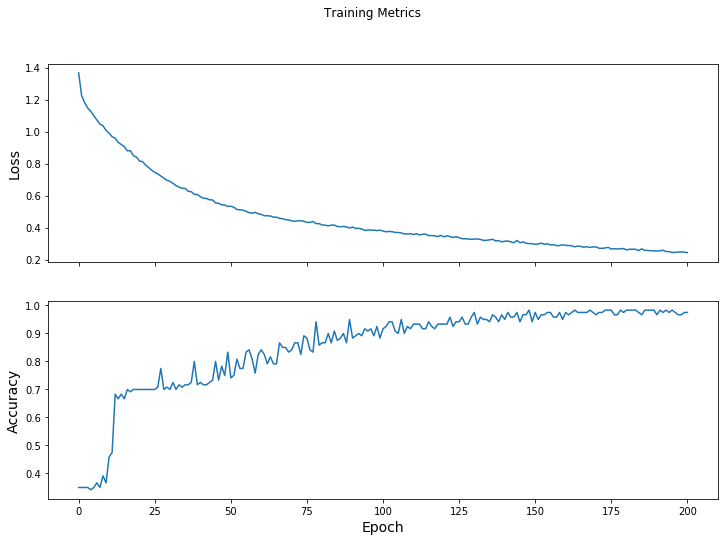

In [29]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [30]:
## Evaluate on test set

test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

In [31]:
test_df = pd.read_csv(test_fp)
test_dataset = tf.data.Dataset.from_tensor_slices((test_df.values[:,:-1],test_df.values[:,-1]))
test_dataset = test_dataset.batch(batch_size)

In [32]:
## Compute test accuracy
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in train_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 98.333%


In [33]:
## new model with another hidden layer so in total we have 1 input layer with size of 4 , 2 hideen layers with sizes of 6 and 1 output layer with output of size 3 for the probabilities of 3 classes that we have (softmax)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(6,activation="relu"), 
  tf.keras.layers.Dense(6,activation="relu"), 
  tf.keras.layers.Dense(3)
])

In [34]:
logits = model(X)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  30        
_________________________________________________________________
dense_7 (Dense)              multiple                  42        
_________________________________________________________________
dense_8 (Dense)              multiple                  21        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [35]:
## Note: Rerunning this cell uses the same model variables

## Create optimizer (chooses learning schedule etc)
optimizer = tf.keras.optimizers.Adam()

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 240

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 3.322, Accuracy: 30.000%
Epoch 050: Loss: 0.868, Accuracy: 64.167%
Epoch 100: Loss: 0.570, Accuracy: 85.000%
Epoch 150: Loss: 0.379, Accuracy: 91.667%
Epoch 200: Loss: 0.257, Accuracy: 95.000%


In [36]:
## Compute test accuracy
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in train_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%
